<a href="https://colab.research.google.com/github/juanosalvador/Dataset-Clusters/blob/main/make_blobs_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

n_samples = 250
n_features = 2
n_clusters = 4
random_state = 42
max_iter = 100

X, y = make_blobs(n_samples=n_samples, 
                  n_features=n_features, 
                  centers=n_clusters, 
                  random_state=random_state)

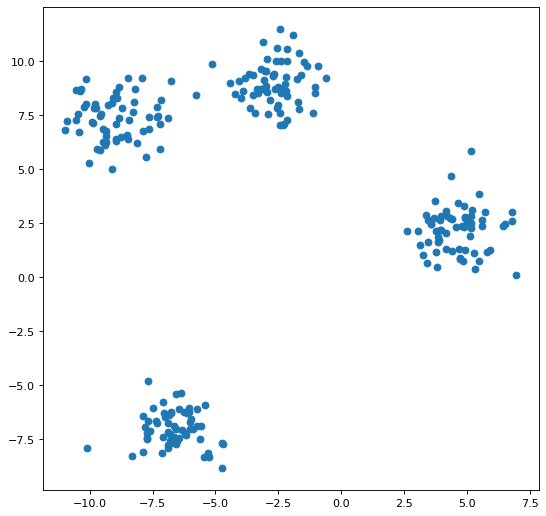

In [2]:
fig=plt.figure(figsize=(8,8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(X[:, 0], X[:, 1]);

In [3]:
"""Encontrando k óptimo por el método del codo"""
numero_cluster = range(2, 10)
kmeans = [KMeans(n_clusters=i).fit(X) for i in numero_cluster]
#kmeans
ssw = [kmeans[i].inertia_ for i in range(len(kmeans))]
"""Encontrando K óptimo por el método de la Silueta"""
K = range(2,11)
silueta = [silhouette_score(X, KMeans(n_clusters=k).fit(X).labels_, metric = 'euclidean') for k in K]

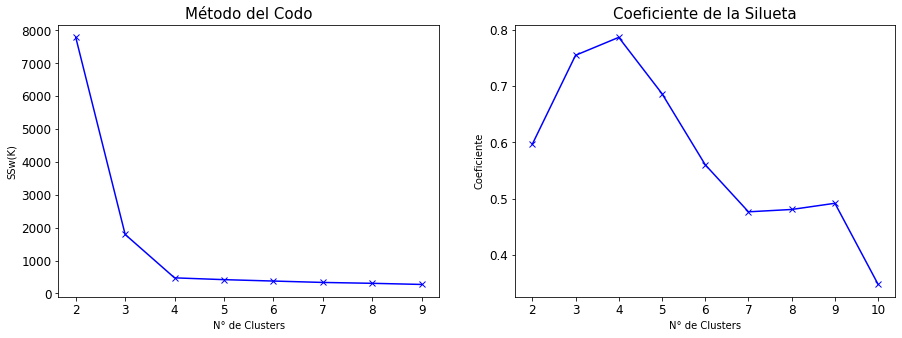

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

axes[0].plot(numero_cluster, ssw,'bx-')
axes[0].set_title('Método del Codo', fontsize=15)
axes[0].set_ylabel('SSw(K)')
axes[0].set_xlabel('N° de Clusters')
axes[0].tick_params(axis='both', labelsize=12)

axes[1].plot(K,silueta, 'bx-')
axes[1].set_title('Coeficiente de la Silueta', fontsize=15)
axes[1].set_ylabel('Coeficiente')
axes[1].set_xlabel('N° de Clusters')
axes[1].tick_params(axis='both', labelsize=12)

In [5]:
# Ejecutamos el Algoritmo para 3 cluster
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters).fit(X)
centroids = kmeans.cluster_centers_

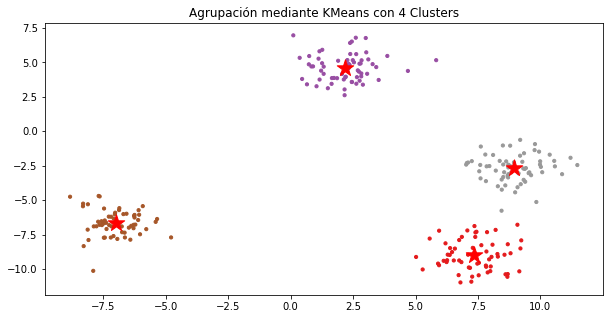

In [6]:
fig, ax = plt.subplots(figsize=(10,5))
plt.scatter(X[:,1], X[:,0], s=10, c = kmeans.labels_, cmap='Set1') #tab10
plt.scatter(centroids[:,1], centroids[:,0], marker = "*", c = 'red', s = 300)
#plt.title('Agrupación mediante KMeans con %d' % n_clusters, ' clusters')
plt.title('Agrupación mediante KMeans con {} Clusters'.format(n_clusters))
plt.show()

# <center><h1>Spectral Clustering - Make moon</h1></center>

In [30]:

from sklearn.cluster import SpectralClustering
import numpy as np
X = np.array([[1, 1], [2, 1], [1, 0],
              [4, 7], [3, 5], [3, 6]])
clustering = SpectralClustering(n_clusters=2,
        assign_labels='discretize',
        random_state=0).fit(X)
clustering.labels_

clustering


SpectralClustering(affinity='rbf', assign_labels='discretize', coef0=1,
                   degree=3, eigen_solver=None, eigen_tol=0.0, gamma=1.0,
                   kernel_params=None, n_clusters=2, n_components=None,
                   n_init=10, n_jobs=None, n_neighbors=10, random_state=0)

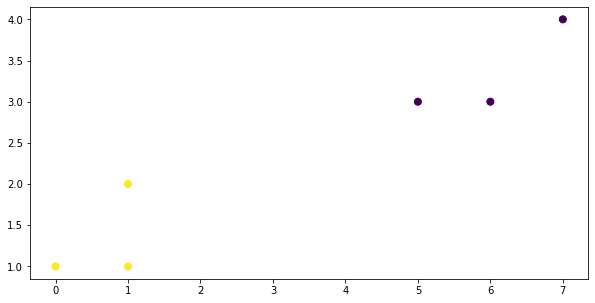

In [33]:
fig, ax = plt.subplots(figsize=(10,5))
plt.scatter(X[:,1], X[:,0], c = clustering.labels_, s=50, cmap='viridis') #tab10
plt.show()

In [34]:
from sklearn.datasets import make_moons

In [35]:
X, y = make_moons(200, noise=.05, random_state=0)

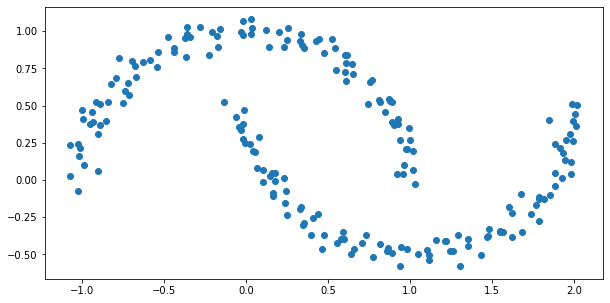

In [36]:
fig, ax = plt.subplots(figsize=(10,5))
plt.scatter(X[:,0], X[:,1]) #tab10
plt.show()

In [37]:
spectral = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')
labels_spectral = spectral.fit_predict(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


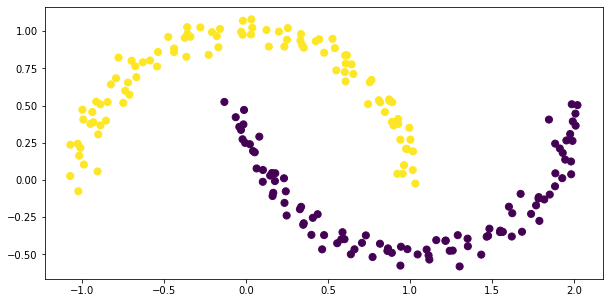

In [38]:
fig, ax = plt.subplots(figsize=(10,5))
plt.scatter(X[:,0], X[:,1], c = labels_spectral, s=50, cmap='viridis') #tab10
plt.show()